<a href="https://colab.research.google.com/github/Raphael-Vargas-Moya/IA/blob/main/Activities/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4.- Supervised learning model: Decision tree

*   Joshua Abdiel Bahena Piedras           2018505
*   Jared Gutierrez Contreras              2131945
*   Raphaël Vargas Moya                    2132207
*   Dora Jazmín González Díaz              2049427
*   Diego Eduardo Rodríguez Arreguín       2004407

Artificial Intelligence - LMVN2 - Biomedical Engineering



---



# **PART 1 - Library importing and load of Dataset**



First of all, we loaded the libraries that we will use along the activity so that we don't get any errors for calling functions that don't exist or something along those lines.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree

For the loading of the dataset, we first downloaded the file "data.csv" from the kaggle database provided link, which will be our dataset, and since we are working in Google Colab which uses virtual machines that reset the files each time, and since mounting Google Drive doesn't link the file to every member of the Team, we chose to upload the dataset file to the GitHub Repository of one of the members of the team, from wich we would get the file with the Unix comand "wget" (which is why we included the "!" at the start, so that Colab knows that it's not Python code) and save it to the "/content" directory of the notebook, which is available to anyone with access to the notebook. Finally, we read the csv file with the "pandas.read_csv" function to a variable called "df" (which stands for Data Frame).

In [2]:
# Source: https://github.com/Raphael-Vargas-Moya/IA/blob/main/Assignments/Assignment_4/data.csv

!wget https://raw.githubusercontent.com/Raphael-Vargas-Moya/IA/refs/heads/main/Assignments/Assignment_4/data.csv -O /content/data.csv
df = pd.read_csv('/content/data.csv')

--2025-10-18 02:45:38--  https://raw.githubusercontent.com/Raphael-Vargas-Moya/IA/refs/heads/main/Assignments/Assignment_4/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125204 (122K) [text/plain]
Saving to: ‘/content/data.csv’

/content/data.csv   100%[===================>] 122.27K  --.-KB/s    in 0.02s   

2025-10-18 02:45:38 (5.21 MB/s) - ‘/content/data.csv’ saved [125204/125204]



To identify inconsistent values, we first checked that there were none Null values (like Null, NaN, etc.) in the dataframe with the "isnull" function and then summed the ammount of the found values that matched the criteria with the "sum" function, and then we displayed it with a print.

In [3]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

As we can see, there is a column ("Unnamed: 32") where all values are Null, and it doesn't appear to have any useful values. Then we later chequed for "0" (zero) values in each column similarly to the previous step.

In [4]:
print((df == 0).sum())

id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             13
concave points_mean        13
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               13
concave points_se          13
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            13
concave points_worst       13
symmetry_worst              0
fractal_dimension_worst     0
Unnamed: 32                 0
dtype: int

We found 13 rows that have "0" values in the columns related to concavity and concave points, but they appear to be normal values and not an error, being a possible explanation that the values were very small (less than the four significant digits used in all feature values according to the dataset source) and were then registered as 0.



---



# **PART 2 - Data Preprocessing**



To prepare the data for later usage, we discarded the columns "Unnamed: 32" and "id" because they don't have any useful data to predict the outcome of the diagnosis, being the "id" only a identifier number; and as previously mentioned being the "Unnamed: 32" column completely empty.

Then, we assigned all the remaining colums but the "diagnosis" one to the "X" array, being the features, and we assigned to the "y" array the results, which are the "diagnosis" column.

In [5]:
df = df.drop(columns=['Unnamed: 32','id'])
X = df.drop(columns=['diagnosis']).values
y = df['diagnosis'].values

With all the values sorted, we then splitted the data into four subsets, two training ones (features and results), with 80% of the data, and the remaining 20% was reserved for the two testing subset as instructed. For this we used the "train_test_split" function and we chose 42 as the "random_state" as is the common practice.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



---



# **PART 3 - Model Training**



For this part we first created a decision tree model with the "DecisionTreeClassifier" function from the scikit-learn library and we setted the "random_state" to 42 here as well to keep results consistent.

In [7]:
model = DecisionTreeClassifier(random_state = 42)

Then, we proceeded to train the model with the "fit" function.

In [8]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Finally, we tested the accuracy of the model in the training subset, that is, the training accuracy.

In [9]:
train_accuracy = model.score(X_train, y_train)
print(train_accuracy)

1.0


And we obtained a 100% accuracy score from the model (tested only on the training subset).



---



# **PART 4 - Model Prediction and Evaluation**



Next, we proceeded with the predictions, using the "predict" function on the testing features subset, and we compared three predictions made by the model with the three testing results from the tesing results subset.

In [10]:
y_pred = model.predict(X_test)

In [11]:
#Prediction 1
print(y_pred[1])
print(y_test[1])

M
M


In [12]:
#Prediction 2
print(y_pred[20])
print(y_test[20])

B
M


In [13]:
#Prediction 3
print(y_pred[-1])
print(y_test[-1])

M
M


As we can see from the examples, two of the three were correct predictions and one wasn't; but to evaluate the whole model and not only some examples, we used the "accuracy_score" function to calculate the accuracy of the model in the testing subset, and we also used the "classification_report" function to summarize the model's performance results during the testing section.

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

class_names = ['Benign', 'Malignant']
print("Classification Report:\n", classification_report(y_test, y_pred, target_names = class_names))

Accuracy:  0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        71
   Malignant       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



And we obtained an accuracy score of approximately 95% for the model in the test subset.



---



# **PART 5 - Decisin Tree Visualization**



Lastly, we used the "plot_tree" function to plot the decision tree, and saved the figure as a PNG file with the "savefig" function with a DPI resolution of 300 as instructed.

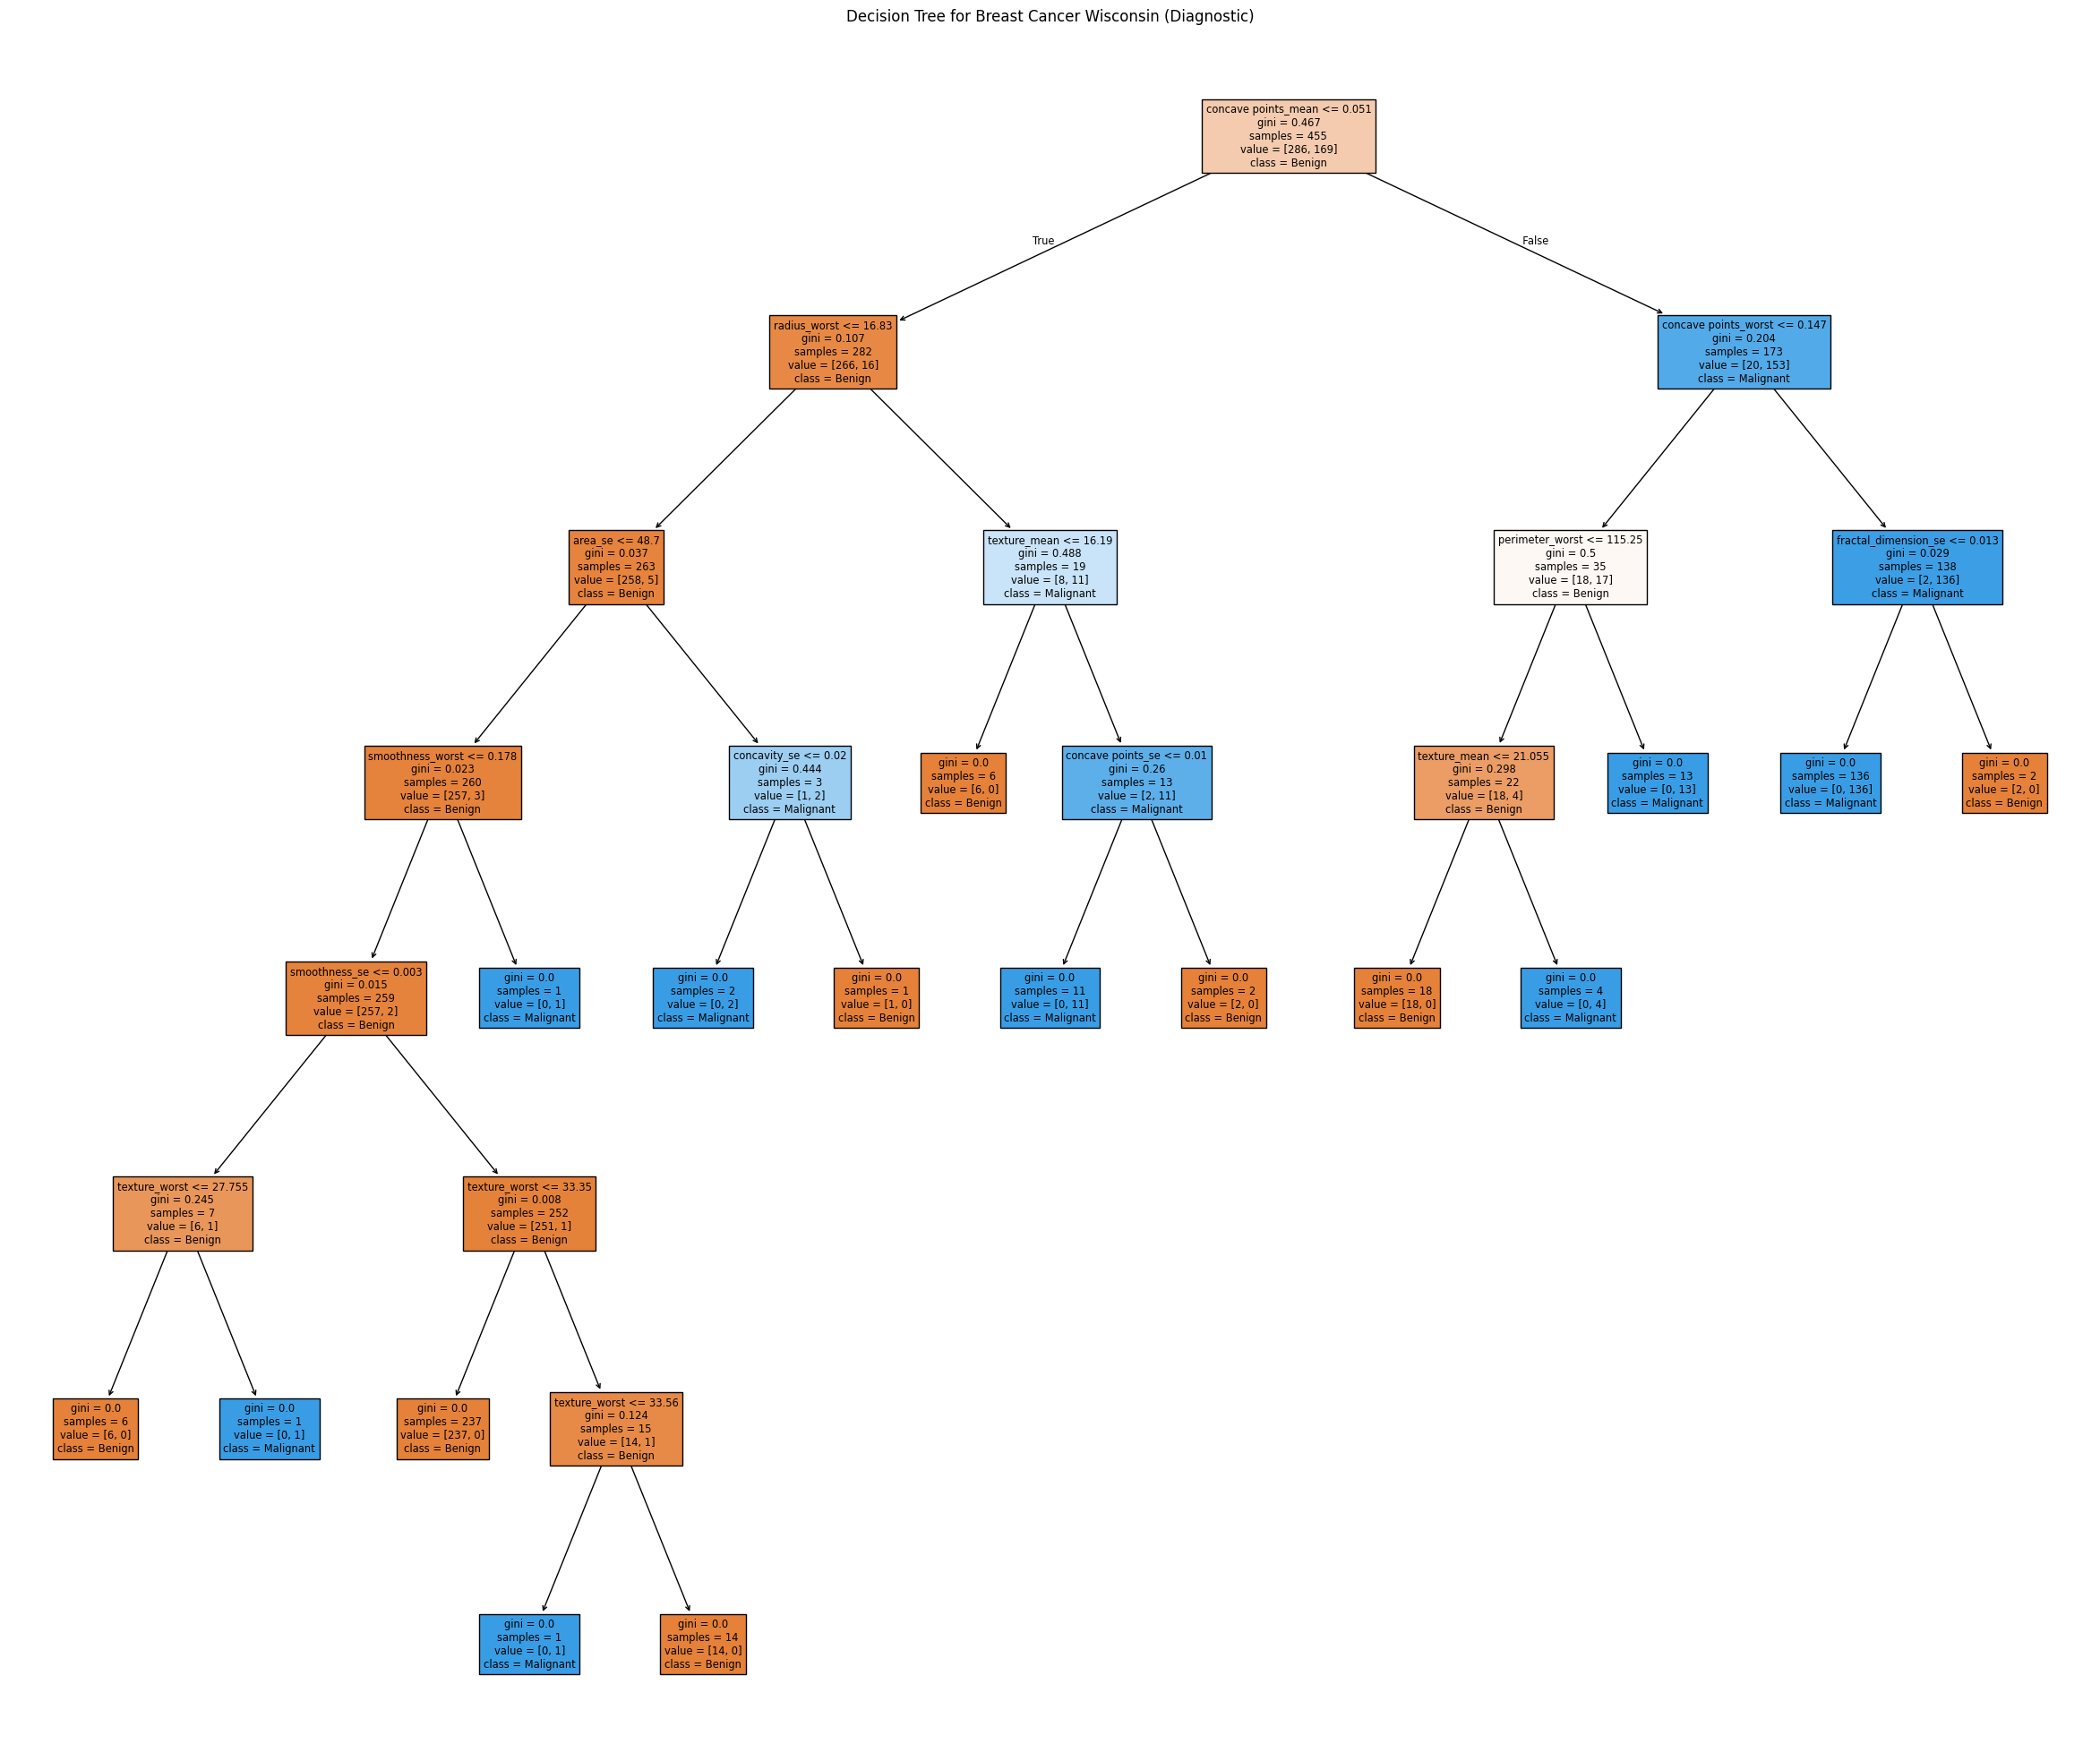

In [15]:
feature_names = df.drop(columns=["diagnosis"]).columns

plt.figure(figsize=(30, 25))
tree.plot_tree(model, filled=True, feature_names = feature_names, class_names = class_names)
plt.title("Decision Tree for Breast Cancer Wisconsin (Diagnostic)")
plt.savefig("decision_tree.png", dpi=300)
plt.show()